In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, mean_squared_error

In [2]:
file_path = "Warehouse_and_Retail_Sales.csv"
df = pd.read_csv(file_path)

In [3]:
df.dropna(subset=['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES'], inplace=True)

In [4]:
label_encoders = {}
for col in ['SUPPLIER', 'ITEM CODE', 'ITEM TYPE']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

In [5]:
X_reg = df[['YEAR', 'MONTH', 'SUPPLIER', 'ITEM CODE', 'ITEM TYPE']]
y_reg = df['RETAIL SALES']
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [6]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)

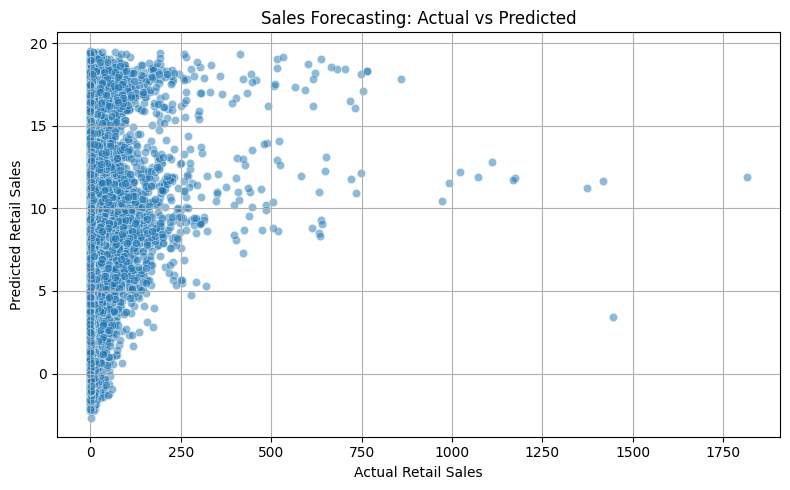

In [7]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Retail Sales")
plt.ylabel("Predicted Retail Sales")
plt.title("Sales Forecasting: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
print("Mean Squared Error (Sales Forecasting):", mean_squared_error(y_test, y_pred))

Mean Squared Error (Sales Forecasting): 1036.9327244581098


In [9]:
quantiles = df['RETAIL SALES'].quantile([0.33, 0.66]).values

def label_demand(value):
    if value <= quantiles[0]:
        return 0  # Low
    elif value <= quantiles[1]:
        return 1  # Medium
    else:
        return 2  # High

df['DEMAND_LABEL'] = df['RETAIL SALES'].apply(label_demand)
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,DEMAND_LABEL
0,2020,1,273,3,BOOTLEG RED - 750ML,7,0.00,0.0,2.0,0
1,2020,1,264,8,MOMENT DE PLAISIR - 750ML,7,0.00,1.0,4.0,0
2,2020,1,271,11,S SMITH ORGANIC PEAR CIDER - 18.7OZ,0,0.00,0.0,1.0,0
3,2020,1,186,13,SCHLINK HAUS KABINETT - 750ML,7,0.00,0.0,1.0,0
4,2020,1,91,20,SANTORINI GAVALA WHITE - 750ML,7,0.82,0.0,0.0,1


In [10]:
X_cls = df.drop(columns=['RETAIL SALES', 'DEMAND_LABEL', 'ITEM DESCRIPTION'])
y_cls = df['DEMAND_LABEL']
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)

In [11]:
clf.fit(X_train_cls, y_train_cls)
y_pred_cls = clf.predict(X_test_cls)

In [12]:
print("\nClassification Report (Demand Classification):\n")
print(classification_report(y_test_cls, y_pred_cls))


Classification Report (Demand Classification):

              precision    recall  f1-score   support

           0       0.89      0.94      0.92     24402
           1       0.76      0.72      0.74     16235
           2       0.88      0.86      0.87     20892

    accuracy                           0.85     61529
   macro avg       0.84      0.84      0.84     61529
weighted avg       0.85      0.85      0.85     61529



In [13]:
cluster_features = df[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_features)
kmeans = KMeans(n_clusters=3, random_state=42)
df['CLUSTER'] = kmeans.fit_predict(scaled_features)

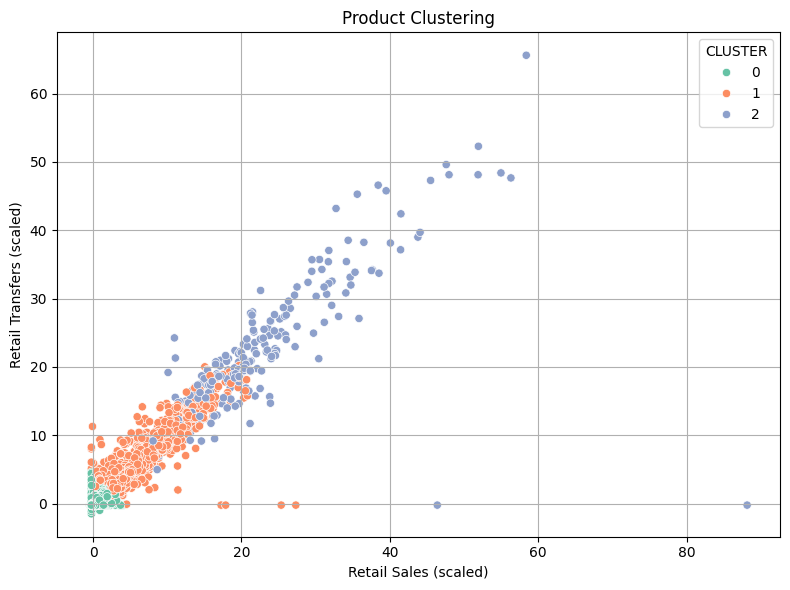

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=df['CLUSTER'], palette='Set2')
plt.xlabel("Retail Sales (scaled)")
plt.ylabel("Retail Transfers (scaled)")
plt.title("Product Clustering")
plt.grid(True)
plt.tight_layout()
plt.show()